In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
def  barplot(df, var1, var2, xlab, ylab, title):
    import matplotlib.pyplot as plt

    ct1  =  pd.crosstab(df[var1], df[var2], dropna=False)
    print("\nCross Tabulation of %s vs %s" % (var1, var2))
    print(ct1)
   
    ct2  =  round(pd.crosstab(df[var1], df[var2], dropna = False, normalize = 'index'),2)*100
    tab  =  pd.concat([ct1, ct2], axis = 1, keys = ['n', 'Percentage'])
 
    ct   = ct2 
    ax   = ct.plot(kind = 'bar', stacked = True, rot = 90)
    ax.legend(title = 'Readmitted', labels = ['Not Readmitted','Readmitted'],  bbox_to_anchor = (1, 1.02), loc = 'upper left')
    
    # add annotations if desired
    for c in ax.containers:
        
        # set the bar label
        ax.bar_label(c, label_type = 'center')

In [7]:
import os

data_dir = r"C:\Users\Rahul\OneDrive\Desktop\Projects\Predicting Early Readmission for Diabetic Patients"
os.chdir(data_dir)

In [9]:
clean_data_file   =  'Cleaned_data_2025-03-05 09-32-53.csv'
model_data_file   =  'Model_data_2025-03-05 09-32-53.csv'

In [11]:
df=pd.read_csv(clean_data_file, keep_default_na = False)

In [12]:
pd.set_option('display.max_columns',50)
df.head()

,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Discharged to,Target
0,Caucasian,Female,[10-20),1.0,7.0,3.0,MD,Emergency/Trauma,59.0,0.0,18.0,0.0,0.0,0.0,276,250.01,255,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Home,0.0
1,AfricanAmerican,Female,[20-30),1.0,7.0,2.0,HM,Urology,11.0,5.0,13.0,2.0,0.0,1.0,648,250,V27,6.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Home,0.0
2,Caucasian,Male,[30-40),1.0,7.0,2.0,OG,InternalMedicine,44.0,1.0,16.0,0.0,0.0,0.0,8,250.43,403,7.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,Home,0.0
3,Caucasian,Male,[40-50),1.0,7.0,1.0,OG,InternalMedicine,51.0,0.0,8.0,0.0,0.0,0.0,197,157,250,5.0,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,Home,0.0
4,Caucasian,Male,[50-60),2.0,2.0,3.0,HM,Radiologist,31.0,6.0,16.0,0.0,0.0,0.0,414,411,250,9.0,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,Home,0.0


# 3. Data Exploration (EDA)

In [17]:
numeric_cols  = df.select_dtypes(include=["number","bool"]).columns.tolist()
print(numeric_cols)

['admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'Target']


In [19]:
cat_cols  = df.select_dtypes(exclude=["number","bool"]).columns.tolist()
print(cat_cols)

['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'Discharged to']


In [21]:
new_numvars = [item for item in numeric_cols if item != 'Target']
print(new_numvars)

['admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


### 3.1. Relationship between variables

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

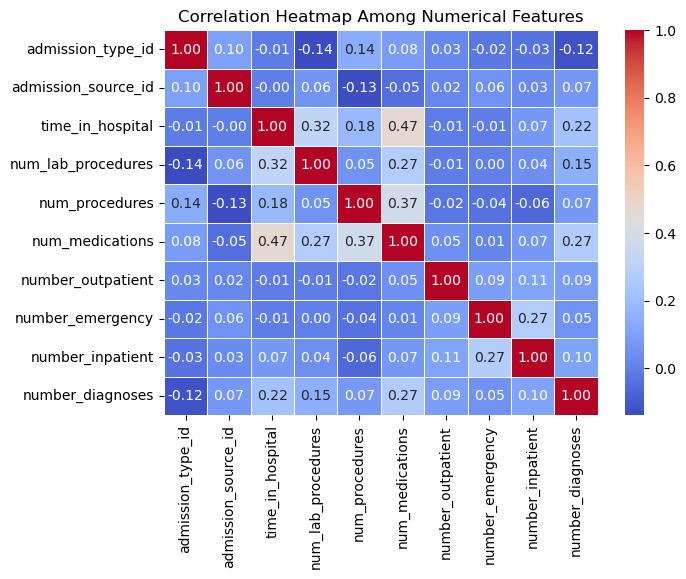

In [24]:
# Heatmap for Correlation Among Numerical Features
plt.figure(figsize=(7, 5))
## corr = df[['time_in_hospital', 'num_lab_procedures', 'num_medications', 'number_outpatient', 'number_emergency',
##            'number_inpatient', 'number_diagnoses']].corr()
corr    = df[new_numvars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Among Numerical Features')
plt.show()

#### Inference:
The correlation analysis shows a weak relationship among the numerical features, with a maximum value
of 0.47 and a minimum of -0.14. This suggests only mild positive correlations and no significant negative
correlation. The weak correlations imply that numerical variables like time in hospital, number of lab
procedures, and medications are largely independent, and no single feature strongly predicts
readmission rates. Therefore, these variables may not be major contributors to readmission outcomes
based on the current correlation analysis.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

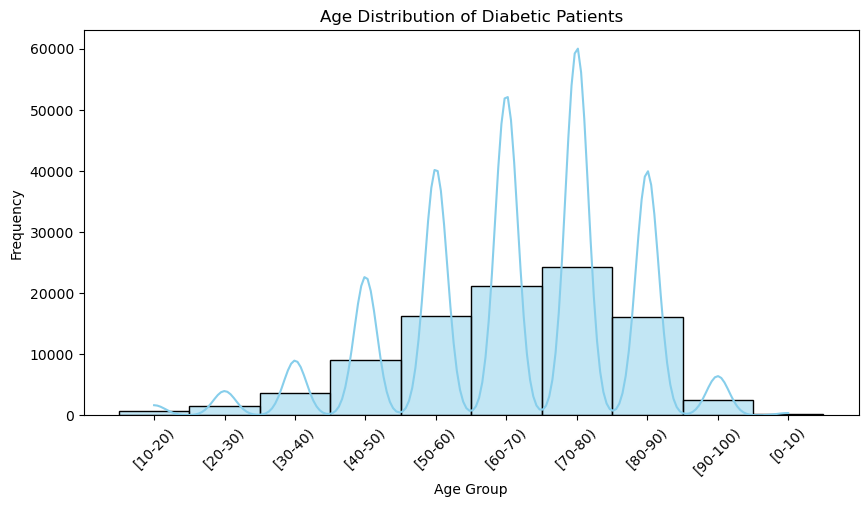

In [26]:
#Histogram of Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Diabetic Patients')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### Inference:
The histogram shows a significant peak in the 60-80 years age group, indicating that most diabetic
patients are from this category. This suggests that older individuals are more prone to diabetes, likely
due to age-related insulin resistance and comorbidities. The higher prevalence in this group may also
correlate with increased readmission rates, highlighting the need for targeted healthcare interventions
to manage their condition and reduce risks.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

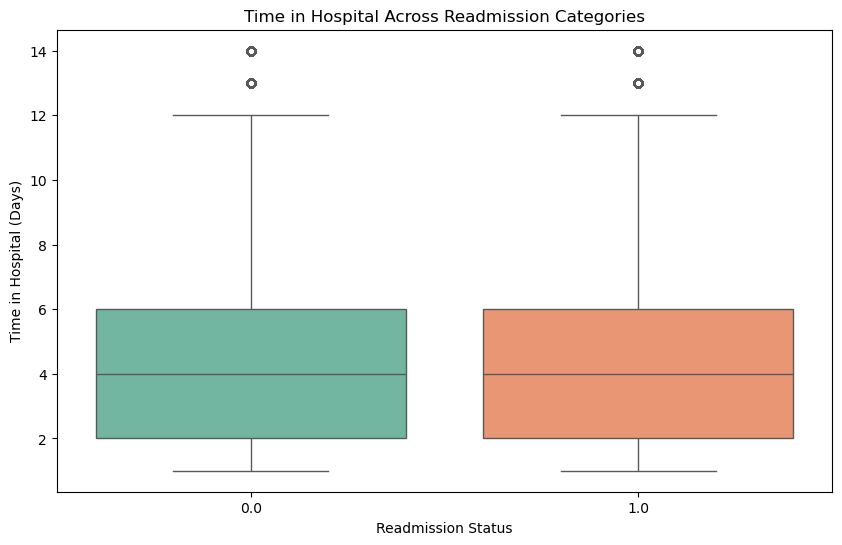

In [29]:
# Boxplot for Time in Hospital Across Readmission Categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='time_in_hospital', data=df, palette='Set2')
plt.title('Time in Hospital Across Readmission Categories')
plt.xlabel('Readmission Status')
plt.ylabel('Time in Hospital (Days)')
plt.show()

#### Inference:
The boxplot for time in hospital across readmission categories shows no significant difference between
patients who were readmitted and those who were not. This suggests that the length of hospital stay
may not be a strong indicator for predicting readmission within 30 days. Other factors, such as
underlying health conditions or post-discharge care, could play a more prominent role in readmission
rates. Therefore, focusing on these aspects might provide more insights into preventing readmissions.


Cross Tabulation of race vs Target
Target             0.0   1.0
race                        
AfricanAmerican  16165  2039
Asian              565    65
Caucasian        64844  8358
Hispanic          1736   202
Other             1317   140


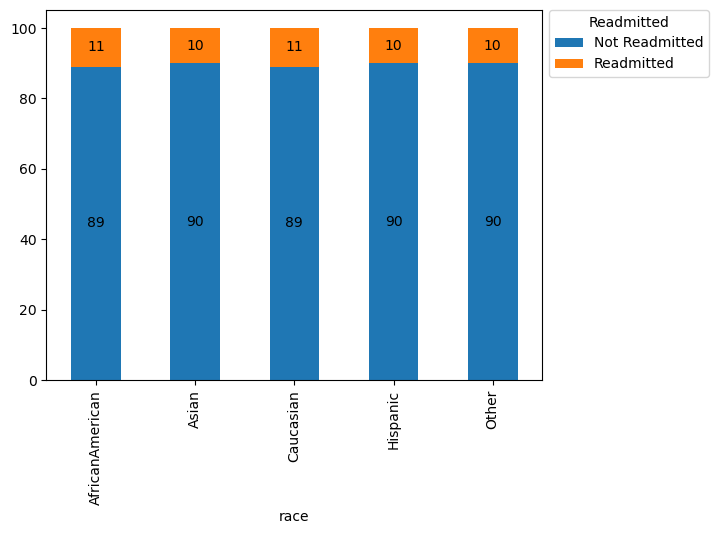

In [31]:
xlab   =  'Race'
ylab   =  'Target'
title  =  'Barplot for race vs Target'
barplot(df, 'race', 'Target', xlab, ylab, title)

#### Inference:
The bar chart for race vs. readmission rate reveals disparities in readmission rates among different racial
groups. Certain groups may exhibit higher readmission rates, indicating potential underlying factors such
as access to healthcare, socioeconomic status, or genetic predispositions. These disparities highlight the
importance of targeting interventions to address the specific needs of higher-risk racial groups. Further
investigation into the healthcare access, cultural, and socioeconomic factors for these groups could
provide valuable insights for reducing readmission rates.

Based on the readmission rates across racial categories, it is observed that Caucasian, African American,
Asian, and Hispanic groups have similar readmission rates, around 0.1, while the "Other" category
exhibits a slightly lower rate of 0.09. This suggests that there are no significant disparities in readmission
rates across these racial groups. It indicates that factors other than race, such as age, comorbidities, or
access to healthcare, might be more influential in determining readmission rates. Further analysis could
help identify other key factors contributing to these patterns.


Cross Tabulation of gender vs Target
Target             0.0   1.0
gender                      
Female           45525  5839
Male             39099  4965
Unknown/Invalid      3     0


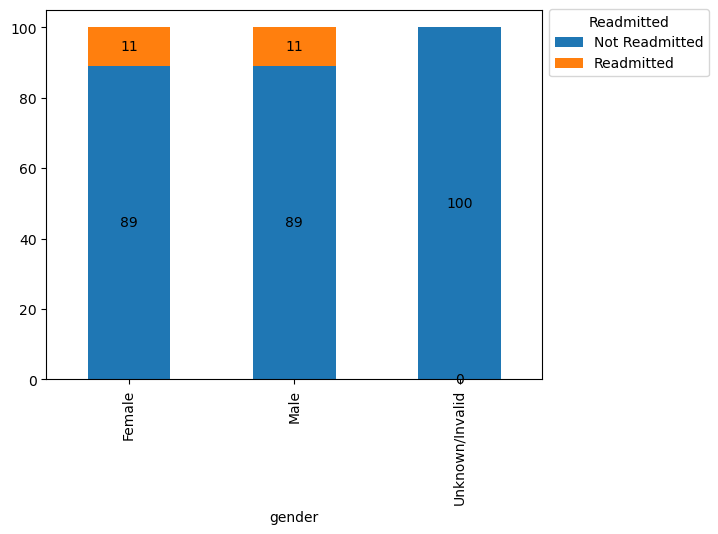

In [33]:
xlab   =  'gender'
ylab   =  'Target'
title  =  'Barplot for gender vs Target'
barplot(df, 'gender', 'Target', xlab, ylab, title)

#### Inference:
The bar plot comparing readmission rates across genders reveals minimal differences between male
and female patients. Both genders show nearly identical readmission trends, suggesting that gender is
not a significant factor influencing readmission likelihood. This indicates that interventions aimed at
reducing readmissions may not need to differentiate based on gender, as the risk appears uniformly
distributed. However, further analysis involving other factors could provide additional insights into subtle
gender-related trends.

### Bar Graph for Discharged to


Cross Tabulation of Discharged to vs Target
Target                 0.0   1.0
Discharged to                   
Facility             17725  3440
Home                 55012  5621
Home with home care  11357  1653
Others                 533    90


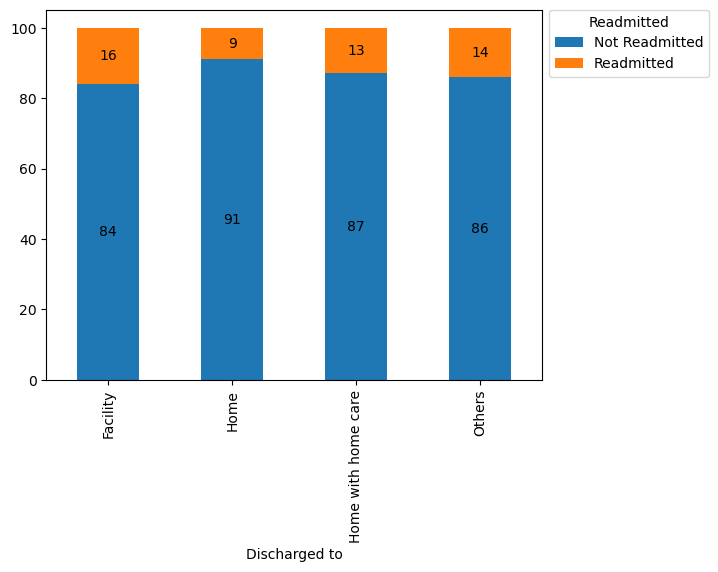

In [37]:
xlab   =  'Discharged to'
ylab   =  'Target'
title  =  'Barplot for Discharged to vs Target'
barplot(df, 'Discharged to', 'Target', xlab, ylab, title)

### Bar Graph for  number_inpatient


Cross Tabulation of number_inpatient vs Target
Target              0.0   1.0
number_inpatient             
0.0               58062  5423
1.0               15911  2402
2.0                5789  1252
3.0                2512   650
4.0                1139   370
5.0                 526   244
6.0                 301   160
7.0                 166    91
8.0                  75    65
9.0                  62    45
10.0                 31    25
11.0                 16    33
12.0                 17    17
13.0                  8    10
14.0                  6     4
15.0                  0     9
16.0                  4     2
18.0                  1     0
19.0                  1     1
21.0                  0     1


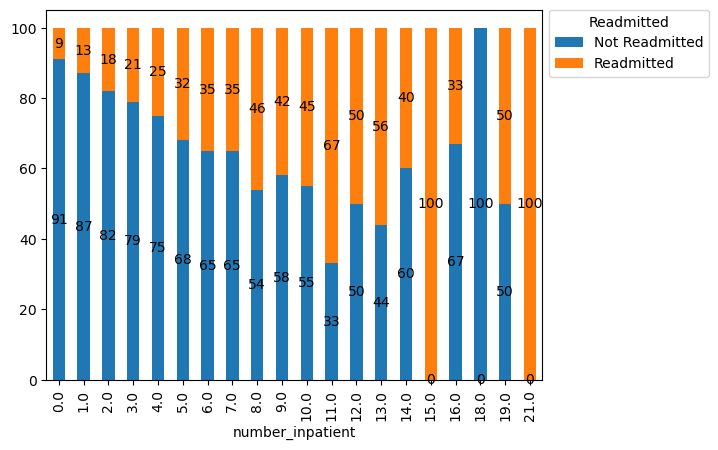

In [40]:
xlab   =  'number_inpatient'
ylab   =  'Target'
title  =  'Barplot for number_inpatient vs Target'
barplot(df, 'number_inpatient', 'Target', xlab, ylab, title)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

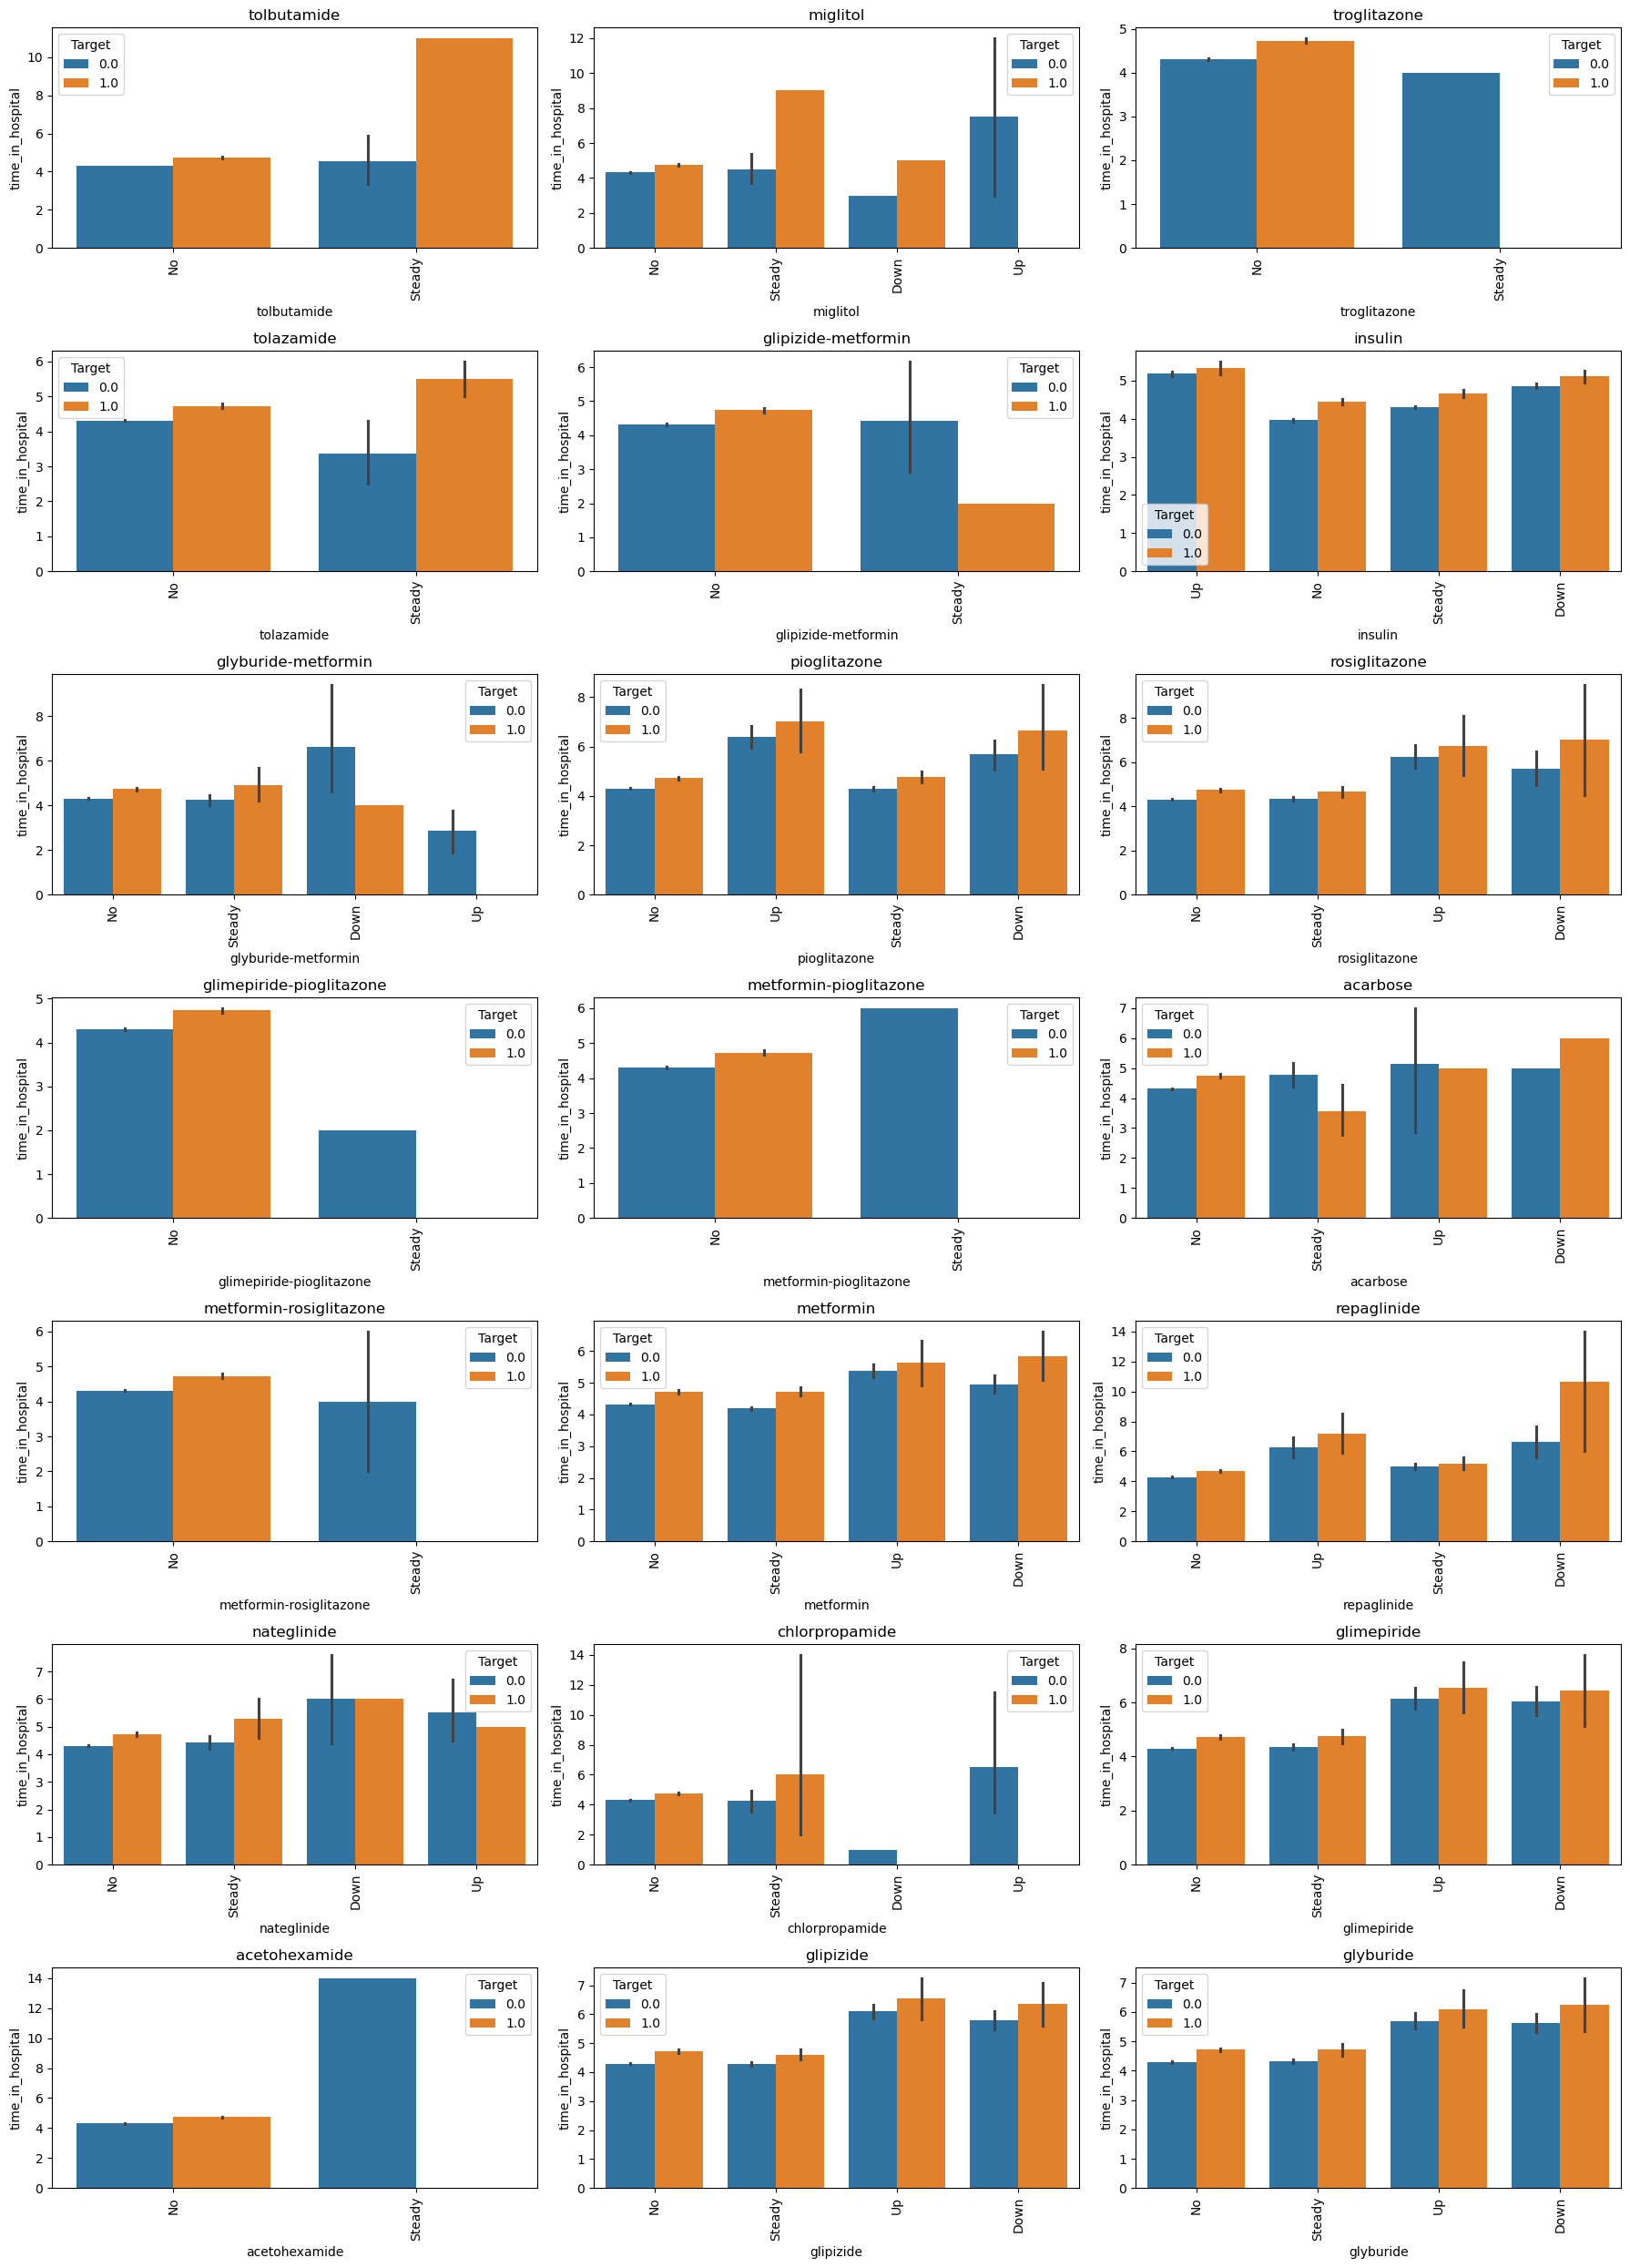

In [42]:
# Relationship Between Drug Dosage and Time Spent in Hospital

# List of drug dosage variables
l = ['tolbutamide', 'miglitol', 'troglitazone', 'tolazamide', 'glipizide-metformin', 'insulin', 
     'glyburide-metformin', 'pioglitazone', 'rosiglitazone', 'glimepiride-pioglitazone', 
     'metformin-pioglitazone', 'acarbose', 'metformin-rosiglitazone', 'metformin', 'repaglinide', 
     'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide']

# Create subplots
fig, axes = plt.subplots(7, 3, figsize=(18, 25))

# Loop through variables and plot
for ax, var in zip(axes.flatten(), l):
    sns.barplot(data=df, x=var, y="time_in_hospital", hue="Target", ax=ax)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### 3.2. Checking for multi-collinearity

In [45]:
model_df  =  pd.read_csv(model_data_file)
model_df.head()

,race,gender,age,admission_type_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,Discharged to,Target
0,2.0,0.0,1.0,1.0,7.0,3.0,8.0,8.0,59.0,0.0,18.0,0.0,0.0,0.0,140.0,78.0,121.0,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,2.0,1.0,7.0,2.0,6.0,71.0,11.0,5.0,13.0,2.0,0.0,1.0,451.0,77.0,760.0,6.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,2.0,1.0,3.0,1.0,7.0,2.0,10.0,18.0,44.0,1.0,16.0,0.0,0.0,0.0,551.0,96.0,247.0,7.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,2.0,1.0,4.0,1.0,7.0,1.0,10.0,18.0,51.0,0.0,8.0,0.0,0.0,0.0,51.0,23.0,86.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,2.0,1.0,5.0,2.0,2.0,3.0,6.0,52.0,31.0,6.0,16.0,0.0,0.0,0.0,260.0,245.0,86.0,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [47]:
X=model_df.drop('Target',axis=1)
y=model_df['Target']

In [48]:
#Checking for multicolleniarty in our independant variables
# VIF dataframe
vif_data            =  pd.DataFrame()
vif_data["feature"] =  X.columns
  
# calculating VIF for each feature
vif_data["VIF"]     = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data.loc[vif_data['VIF'] > 5]

,feature,VIF
2,age,18.060840
8,num_lab_procedures,6.952433
10,num_medications,8.355426
14,diag_1,5.499773
17,number_diagnoses,20.097050
18,max_glu_serum,44.123739
19,A1Cresult,14.674268
20,metformin,9.705956
21,repaglinide,55.824415
22,nateglinide,125.375811


### 3.3. Checking for distribution of variables

#### For numerical discrete data:

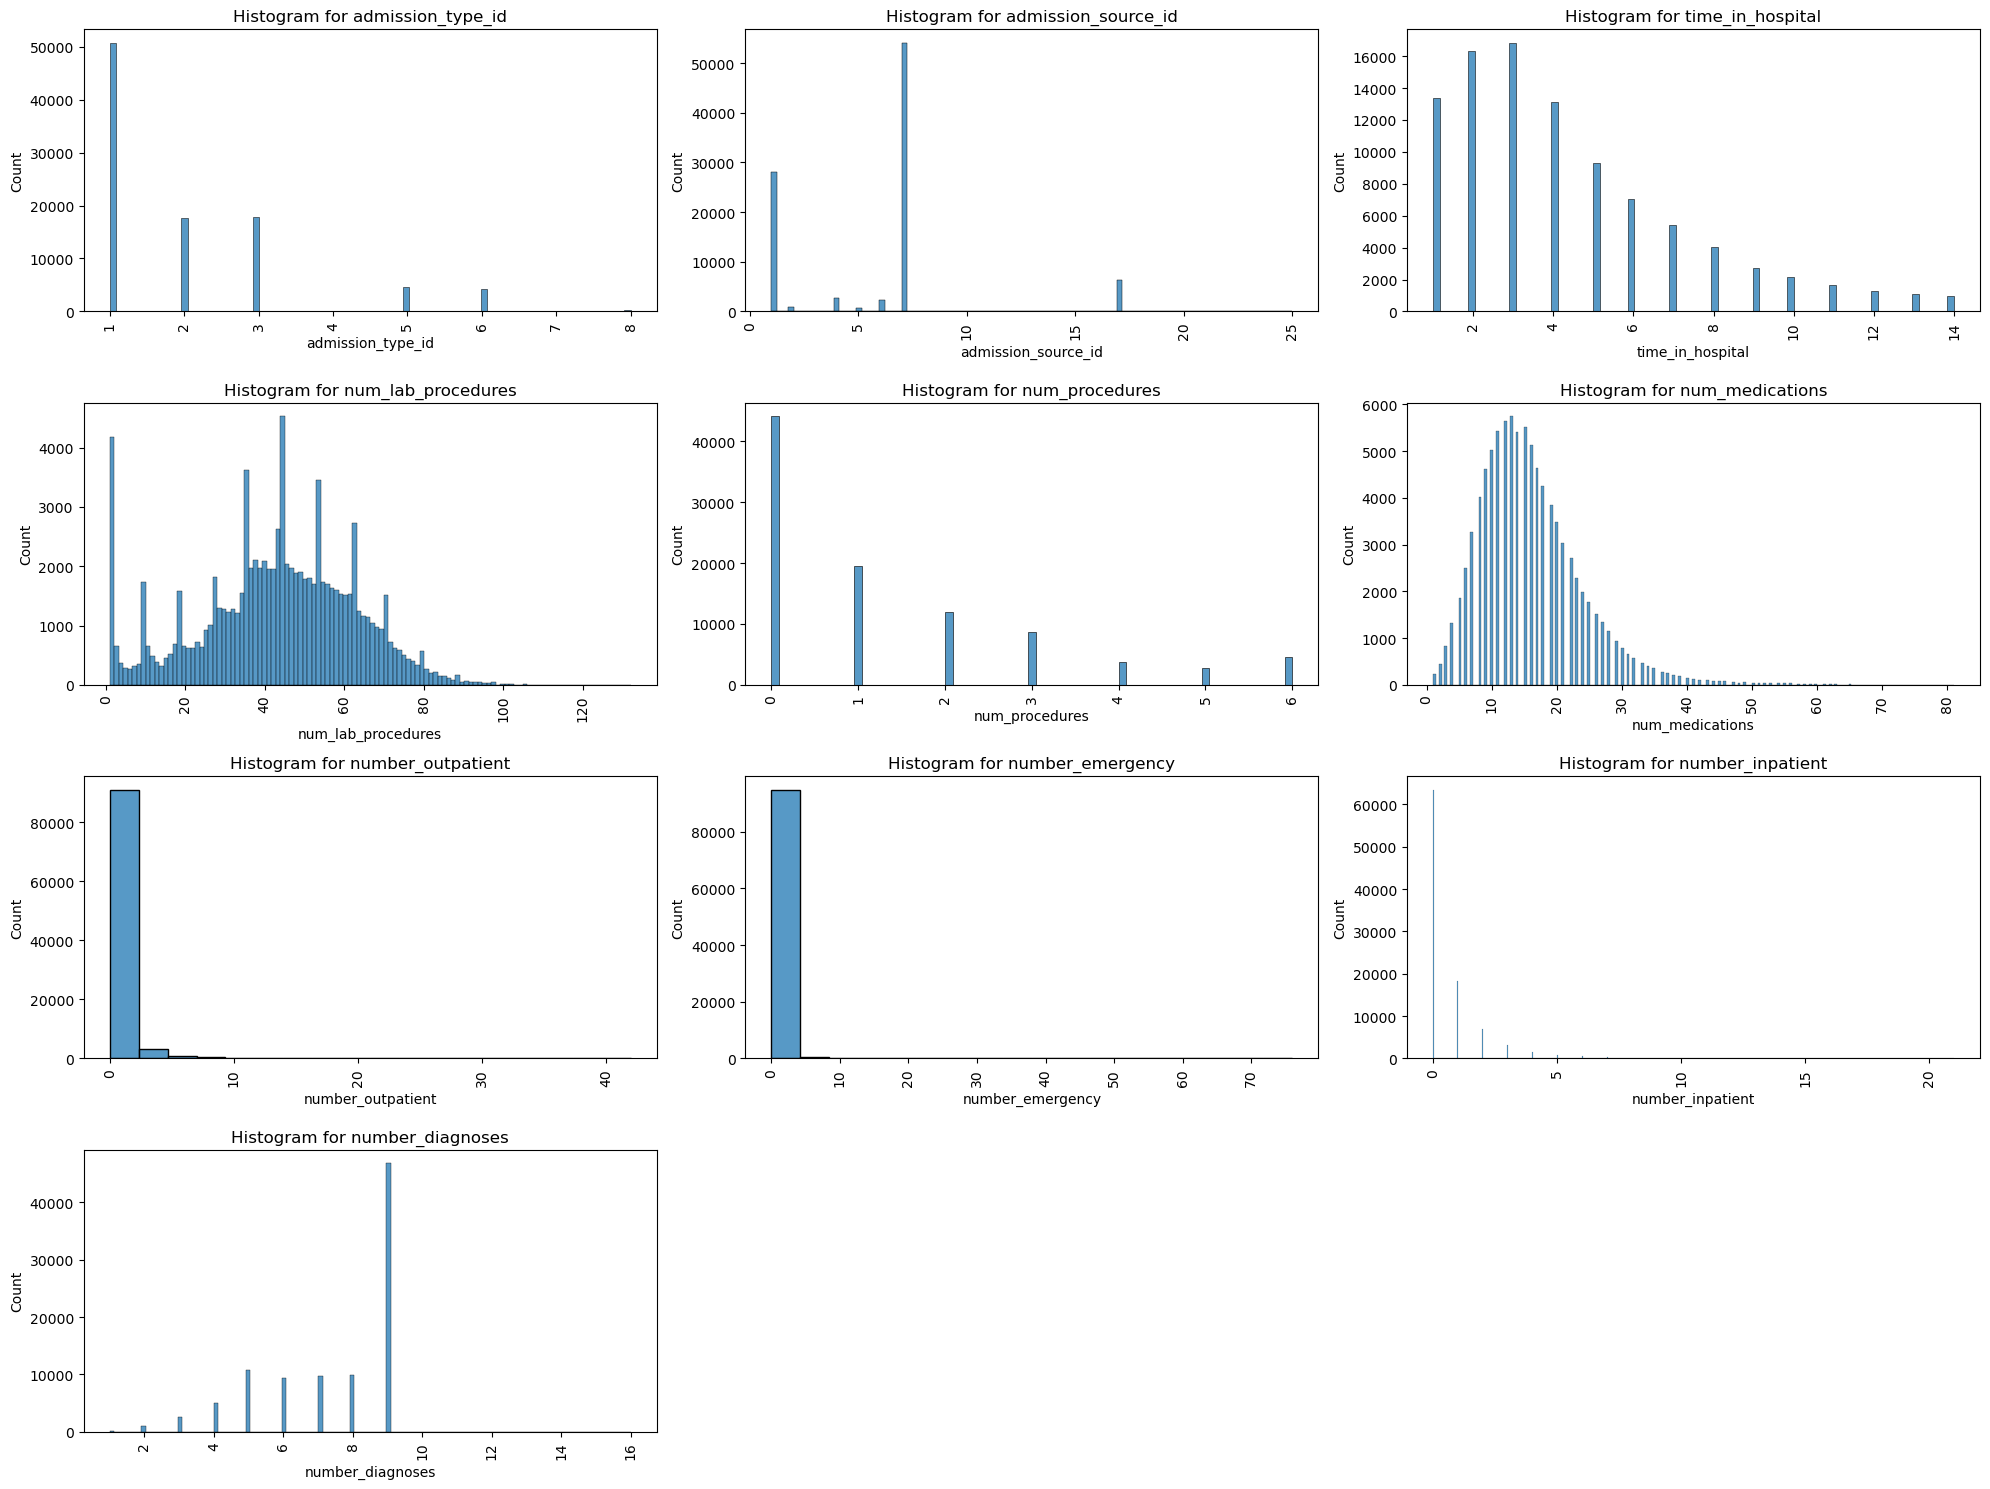

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical variables
num_vars  =  new_numvars
rows      =  4  
cols      =  3  

fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  
axes = axes.flatten()  

# Plot each variable in a subplot
for i, num_var in enumerate(num_vars):
    sns.histplot(data=df, x=num_var, ax=axes[i])  
    axes[i].set_title(f"Histogram for {num_var}")
    axes[i].tick_params(axis='x', rotation=90)  

# Remove any extra subplots
for i in range(len(num_vars), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### For categorical variables:

In [54]:
catplot_cols  =   ['race', 'gender', 'age', 'payer_code', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',\
                   'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',\
                   'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',\
                   'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'Discharged to']

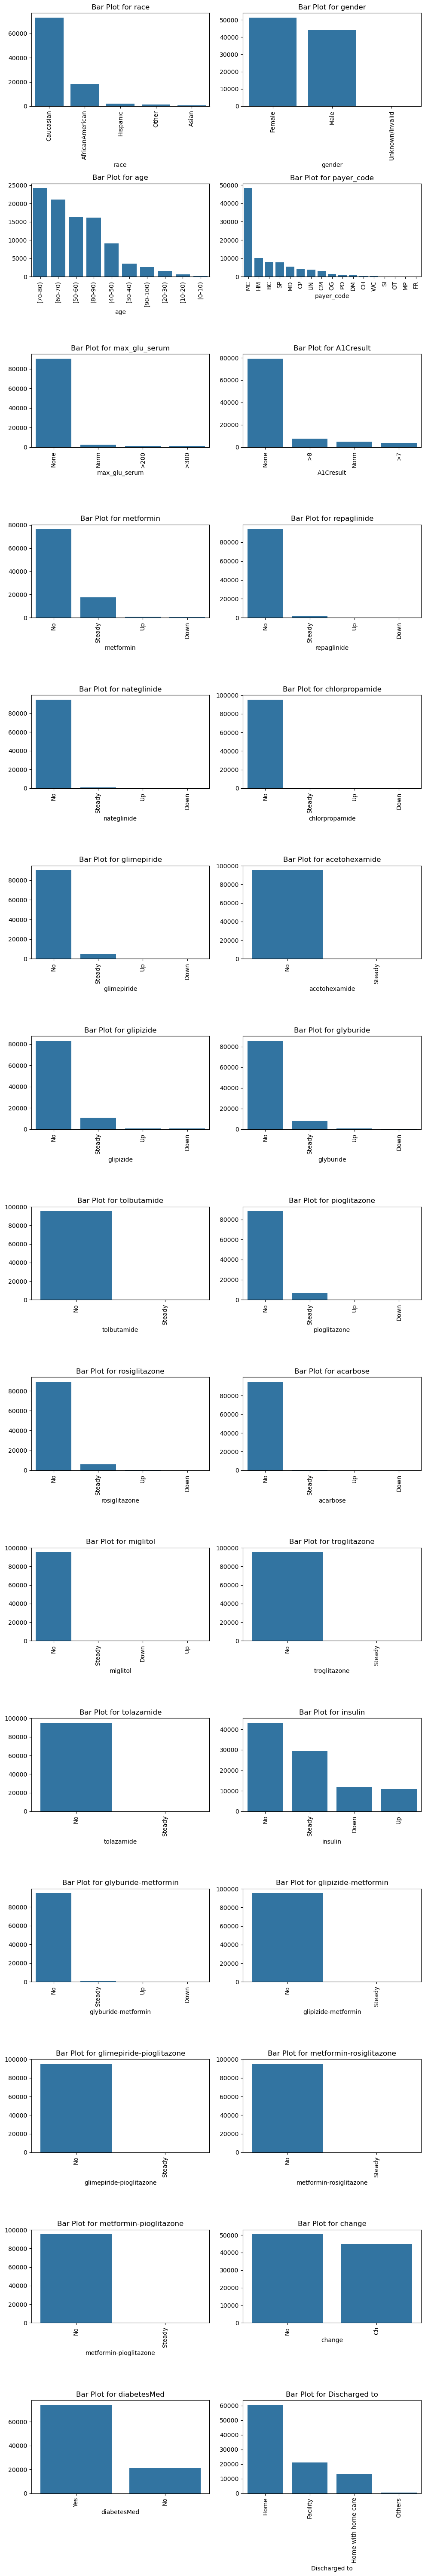

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_columns  =  cat_cols

# Calculate rows needed for 2 columns
n_rows = (len(catplot_cols) + 1) // 2

# Increase the width of the plot by adjusting figsize
fig, axes = plt.subplots(n_rows, 2, figsize=(10, n_rows * 4))  # Width set to 20
axes = axes.flatten()

for idx, var in enumerate(catplot_cols):
    sns.barplot(
        x    =  df[var].value_counts().index, 
        y    =  df[var].value_counts().values, 
        ax   =  axes[idx]
    )
    axes[idx].set_title(f"Bar Plot for {var}")
    axes[idx].tick_params(axis = 'x', rotation = 90)

# Hide any unused subplots
for ax in axes[len(catplot_cols):]:
    ax.axis('off')
plt.tight_layout()
plt.show()


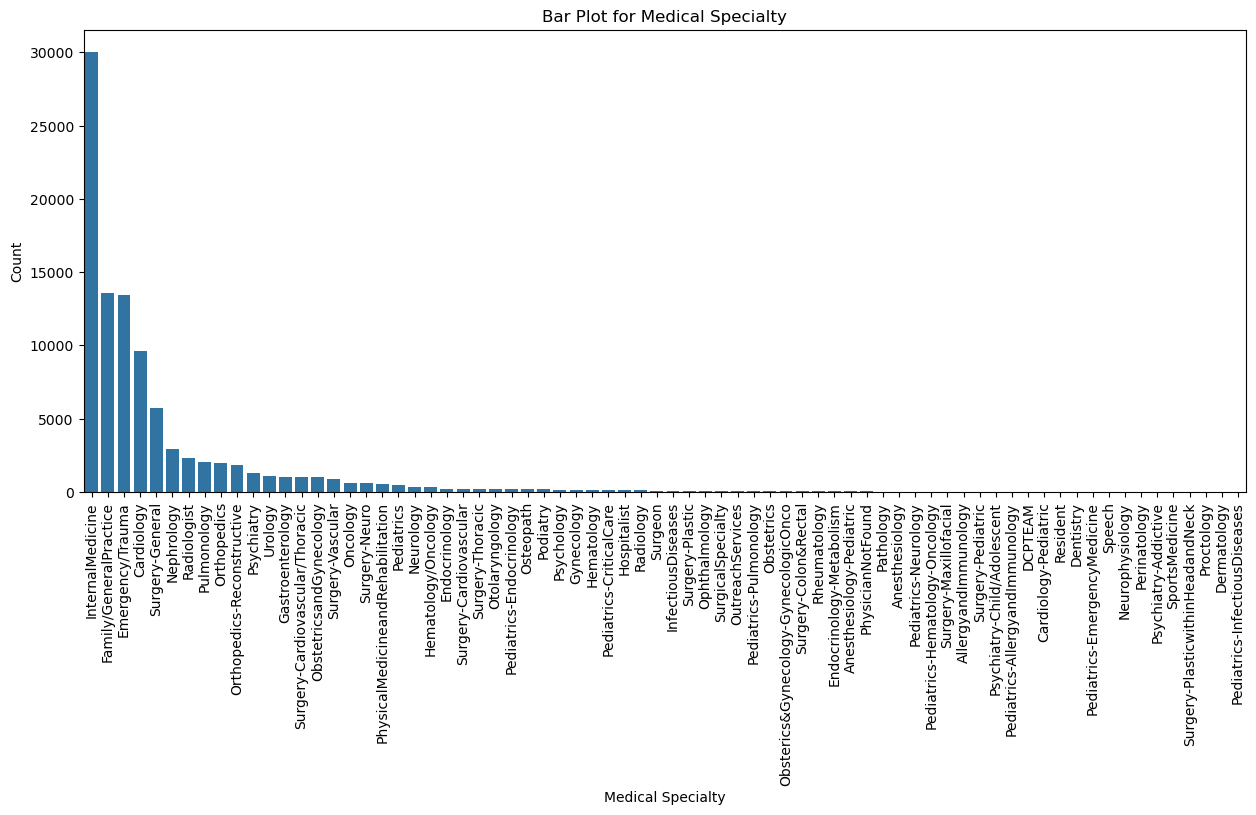

In [56]:
# Compute value counts for the column
value_counts = df['medical_specialty'].value_counts()

plt.figure(figsize=(15,6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title("Bar Plot for Medical Specialty")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Medical Specialty")
plt.ylabel("Count")
plt.show()

In [57]:
def categorize_diag(value):
    # Check if the value is null (None or NaN)
    if pd.isnull(value):
        return value  # Keep null as it is

    # Proceed with categorization for non-null values
    value = str(value)  # Ensure the value is treated as a string

    if value.startswith('250'):  # Diabetes-related codes
        return 'Diabetes'
    elif value.isdigit() and (390 <= int(value) <= 459 or int(value) == 785):  # Circulatory diseases
        return 'Circulatory'
    elif value.isdigit() and (460 <= int(value) <= 519 or int(value) == 786):  # Respiratory diseases
        return 'Respiratory'
    elif value.isdigit() and (520 <= int(value) <= 579 or int(value) == 787):  # Digestive diseases
        return 'Digestive'
    elif value.isdigit() and 800 <= int(value) <= 999:  # Injury
        return 'Injury'
    elif value.isdigit() and 710 <= int(value) <= 739:  # Musculoskeletal
        return 'Musculoskeletal'
    elif value.isdigit() and (580 <= int(value) <= 629 or int(value) == 788):  # Genitourinary
        return 'Genitourinary'
    elif value.isdigit() and 140 <= int(value) <= 239:  # Neoplasms
        return 'Neoplasms'
    else:  # All other values, including codes like 'V57' or 'E11'
        return 'Others'


daignosis=pd.DataFrame(columns=['diag_1', 'diag_2', 'diag_3'])
for i in daignosis.columns:
    daignosis[i]=df[i].apply(categorize_diag)

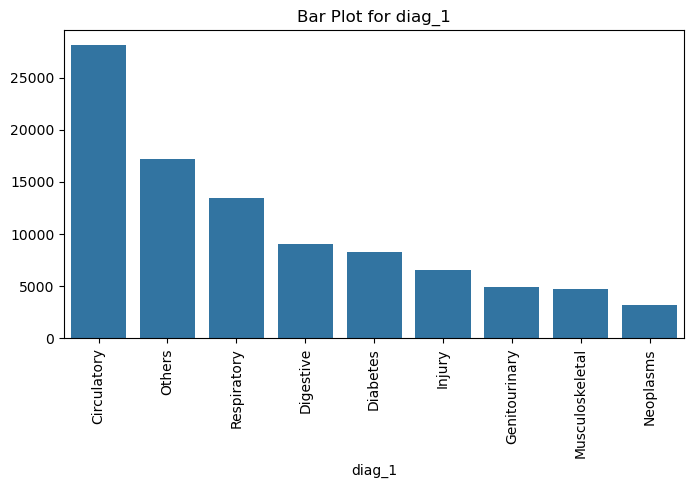

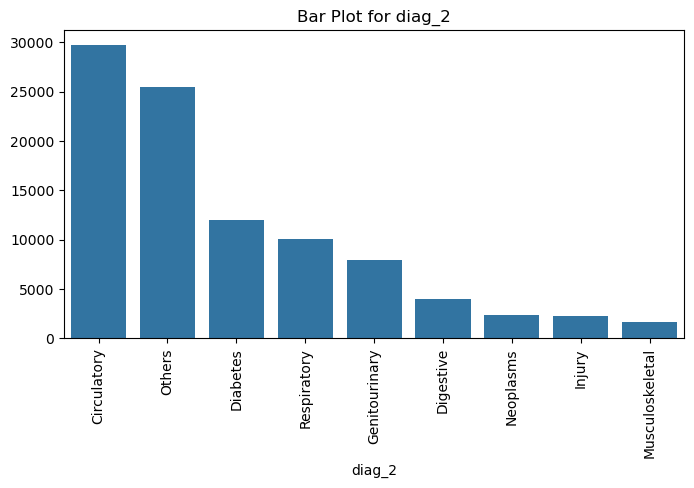

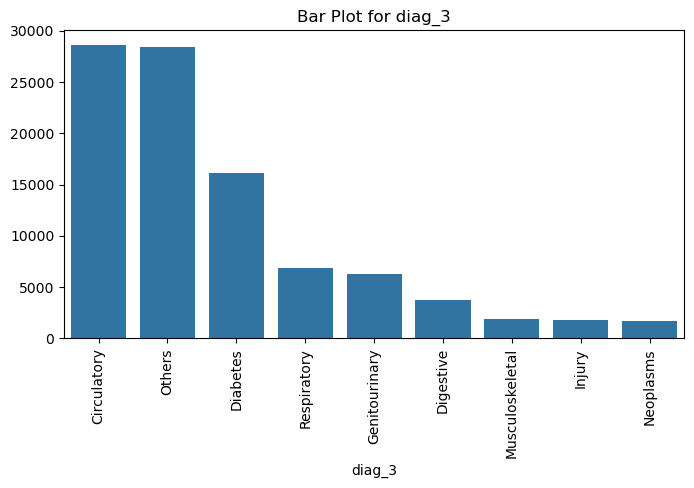

In [58]:
l=['diag_1', 'diag_2', 'diag_3']
for var in l:
    plt.figure(figsize=(8, 4)) 
    sns.barplot(x=daignosis[var].value_counts().index, y=daignosis[var].value_counts().values)
    plt.title(f"Bar Plot for {var}")  
    plt.xticks(rotation=90)  
    plt.show()  

### 3.4. Checking for presence of outliers and its treatment

#### Summary on Outlier Treatment:
Outliers can significantly affect the mean and standard deviation, leading to increased error variance and reduced power in statistical tests. Identifying outliers is essential for improving model accuracy, especially in continuous numerical variables, where they distort central tendency measures. Outlier detection can be done using visual methods like box plots or statistical techniques such as z-scores. While discrete variables are less affected, outliers should still be addressed if they are physically possible. The primary goal of outlier treatment is to ensure more reliable analysis and robust machine learning models. 

##### **Unfortunately, we don't have any continuous numerical variables in our dataset.**

### 3.5. Checking for statistical significance of variables

#### 3.5.1 For Numerical variables:
**t test for discrete data**

The one sample t-test requires the sample data to be numeric and continuous, as it is based on the normal distribution. Hence, t test is not -appropriate for our numerical data which are discrete.

#### Kruskal–Wallis test
The Kruskal–Wallis test is a statistical test used to compare two or more groups for a continuous or discrete variable. It is a non-parametric test, meaning that it assumes no particular distribution of your data and is analogous to the one-way analysis of variance (ANOVA).

In [65]:
def chk_kruskal(var):
    import       scipy.stats   as   stats
    g1           =   df.loc[df['Target'] == 0, var]
    g2           =   df.loc[df['Target'] == 1, var]    
    stat, pval   =   stats.kruskal(g1, g2)
    txt          =   "\nThere is No statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    if pval < 0.05:
       txt       =   "\nThere is a statistically significant difference between the mean values of two groups of the Variable, {} ".format(var)
    print(txt) 

In [66]:
# Define the numerical and categorical columns for analysis
numerical_columns    =  new_numvars
for var in numerical_columns :
    chk_kruskal(var)


There is a statistically significant difference between the mean values of two groups of the Variable, admission_type_id 

There is a statistically significant difference between the mean values of two groups of the Variable, admission_source_id 

There is a statistically significant difference between the mean values of two groups of the Variable, time_in_hospital 

There is a statistically significant difference between the mean values of two groups of the Variable, num_lab_procedures 

There is No statistically significant difference between the mean values of two groups of the Variable, num_procedures 

There is a statistically significant difference between the mean values of two groups of the Variable, num_medications 

There is a statistically significant difference between the mean values of two groups of the Variable, number_outpatient 

There is a statistically significant difference between the mean values of two groups of the Variable, number_emergency 

There is a statist

#### 3.5.2 For Categorical variables:

#### The $\chi^2$ - (Chi Sqaure) test of independence analysis utilizes a cross tabulation table between the variables of interest r rows and c columns. 

Based on the cell counts, it is possible to test if there is a relationship, dependence, between the variables and to estimate the strength of the relationship. 

 **Assumptions**

* The two samples are independent
* No expected cell count is = 0
* No more than 20% of the cells have and expected cell count < 5

 **Hypothesis**

Null hypothesis $H_0$: Variables are independent	

Alternative hypothesis $H_1$: Variables are NOT independent	

In [69]:
def chk_chisq(i, var):
    print("\n{0}: Variable, {1}".format(i, var))
    crosstab                                    = pd.crosstab(df[var], df['Target'])
    res                                         = stats.chi2_contingency(crosstab)
    txt                                         =  "Independent Variable and Target variable are independent"
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5")
    print("\nThis can be checked by looking at the expected frequency table.")
    print(res)
    # Calculate the percentage of cells with expected counts less than 5\
    expected                =  res[3]
    percentage_low_expected = (expected < 5).sum().sum() / (expected.shape[0] * expected.shape[1]) * 100
    print("\n")
    print(f"Percentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%")
    
    if res[1] < 0.05:
        txt                                     =  "Independent Variable,{} and Target variable are dependent".format(var)    
 
    print("\n{}".format(txt))   

In [70]:
# Define the categorical columns for analysis
'''
categorical_columns  =  ['race','gender','medical_specialty','diag_1','diag_2', 'diag_3', 'acetohexamide',\
                            'tolbutamide','troglitazone', 'tolazamide', 'insulin', 'glipizide-metformin','glimepiride-pioglitazone',\
                            'metformin-rosiglitazone','metformin-pioglitazone','change']
'''
categorical_columns  =  cat_cols
i  =  1
for var in categorical_columns :
    chk_chisq(i, var)
    i += 1


1: Variable, race


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=7.3867608816429, pvalue=0.11680757669788251, dof=4, expected_freq=array([[16143.07623309,  2060.92376691],
       [  558.67600675,    71.32399325],
       [64914.60483491,  8287.39516509],
       [ 1718.59381124,   219.40618876],
       [ 1292.04911402,   164.95088598]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable and Target variable are independent

2: Variable, gender


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.6201133070779852, pvalue=0.7334054050355779, dof=2, expected_freq=array([[4.55489435e+04, 5.81505649e+03],
       [3.90753961e+04, 4.98860387e+03],
       [2.66036194e+00, 3.39638063e-01]]))


Percentage of cells with expected counts less than 5: 33.33%

Independent Variable and Target variable are independent

3: Variable, age


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=125.79246644574363, pvalue=8.679697679066548e-23, dof=9, expected_freq=array([[1.33018097e+02, 1.69819032e+01],
       [5.89713563e+02, 7.52864373e+01],
       [1.41531255e+03, 1.80687450e+02],
       [3.19509469e+03, 4.07905314e+02],
       [8.09902852e+03, 1.03397148e+03],
       [1.44280296e+04, 1.84197043e+03],
       [1.87183066e+04, 2.38969341e+03],
       [2.14912905e+04, 2.74370949e+03],
       [1.42684079e+04, 1.82159215e+03],
       [2.28879805e+03, 2.92201947e+02]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,age and Target variable are dependent

4: Variable, payer_code


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=97.17094914191824, pvalue=1.1711481235093138e-13, dof=16, expected_freq=array([[7.03577054e+03, 8.98229464e+02],
       [2.43866511e+02, 3.11334891e+01],
       [2.85722872e+03, 3.64771280e+02],
       [3.78835540e+03, 4.83644602e+02],
       [8.15844327e+02, 1.04155673e+02],
       [1.77357462e+00, 2.26425375e-01],
       [8.92551430e+03, 1.13948570e+03],
       [4.28779401e+04, 5.47405988e+03],
       [4.80284008e+03, 6.13159917e+02],
       [1.19716287e+02, 1.52837128e+01],
       [1.38250142e+03, 1.76498580e+02],
       [1.34791671e+02, 1.72083285e+01],
       [9.23145592e+02, 1.17854408e+02],
       [1.41885970e+02, 1.81140300e+01],
       [7.01714800e+03, 8.95851998e+02],
       [3.34939568e+03, 4.27604321e+02],
       [2.09281806e+02, 2.67181943e+01]]))


Percentage of cells with expected counts

<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=348.12035340903765, pvalue=3.675282667861851e-38, dof=71, expected_freq=array([[1.06414477e+01, 1.35855225e+00],
       [1.95093209e+01, 2.49067913e+00],
       [2.39432574e+01, 3.05674257e+00],
       [8.51936571e+03, 1.08763429e+03],
       [7.98108581e+00, 1.01891419e+00],
       [9.75466044e+00, 1.24533956e+00],
       [4.43393656e+00, 5.66063439e-01],
       [8.86787312e-01, 1.13212688e-01],
       [1.19343836e+04, 1.52361635e+03],
       [1.86225336e+02, 2.37746644e+01],
       [2.48300447e+01, 3.16995526e+00],
       [1.20656282e+04, 1.54037183e+03],
       [9.24032379e+02, 1.17967621e+02],
       [1.22376649e+02, 1.56233509e+01],
       [1.21489862e+02, 1.55101382e+01],
       [2.80224791e+02, 3.57752093e+01],
       [8.77919439e+01, 1.12080561e+01],
       [7.09429850e+01, 9.05701502e+00],
   

<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1754.428848503911, pvalue=1.0723290247711929e-89, dof=711, expected_freq=array([[0.88678731, 0.11321269],
       [8.86787312, 1.13212688],
       [1.77357462, 0.22642538],
       ...,
       [0.88678731, 0.11321269],
       [0.88678731, 0.11321269],
       [7.98108581, 1.01891419]]))


Percentage of cells with expected counts less than 5: 51.90%

Independent Variable,diag_1 and Target variable are dependent

7: Variable, diag_2


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1342.9665205258984, pvalue=2.336839389488398e-37, dof=741, expected_freq=array([[2.66036194e+00, 3.39638063e-01],
       [6.20751119e+00, 7.92488814e-01],
       [8.86787312e-01, 1.13212688e-01],
       ...,
       [1.15282351e+01, 1.47176494e+00],
       [1.50753843e+02, 1.92461569e+01],
       [1.77357462e+00, 2.26425375e-01]]))


Percentage of cells with expected counts less than 5: 56.60%

Independent Variable,diag_2 and Target variable are dependent

8: Variable, diag_3


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1574.208741865583, pvalue=1.198182518698543e-55, dof=782, expected_freq=array([[ 1.77357462,  0.22642538],
       [21.2828955 ,  2.7171045 ],
       [ 0.88678731,  0.11321269],
       ...,
       [ 7.0942985 ,  0.9057015 ],
       [85.13158198, 10.86841802],
       [ 3.54714925,  0.45285075]]))


Percentage of cells with expected counts less than 5: 56.26%

Independent Variable,diag_3 and Target variable are dependent

9: Variable, max_glu_serum


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=15.616591832127682, pvalue=0.0013588194210918938, dof=3, expected_freq=array([[ 1169.67246492,   149.32753508],
       [ 1014.48468527,   129.51531473],
       [80309.23257642, 10252.76742358],
       [ 2133.61027339,   272.38972661]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,max_glu_serum and Target variable are dependent

10: Variable, A1Cresult


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=43.921705150973295, pvalue=1.5680972529474364e-09, dof=3, expected_freq=array([[ 3188.88717503,   407.11282497],
       [ 6826.48873008,   871.51126992],
       [70387.85612642,  8986.14387358],
       [ 4223.76796848,   539.23203152]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,A1Cresult and Target variable are dependent

11: Variable, metformin


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=62.631956237924655, pvalue=1.609743630884739e-13, dof=3, expected_freq=array([[4.80638723e+02, 6.13612767e+01],
       [6.78046447e+04, 8.65635531e+03],
       [1.54602500e+04, 1.97375000e+03],
       [8.81466588e+02, 1.12533412e+02]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,metformin and Target variable are dependent

12: Variable, repaglinide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=10.540019999557387, pvalue=0.014491861465735566, dof=3, expected_freq=array([[3.72450671e+01, 4.75493288e+00],
       [8.32968190e+04, 1.06341810e+04],
       [1.19627608e+03, 1.52723916e+02],
       [9.66598170e+01, 1.23401830e+01]]))


Percentage of cells with expected counts less than 5: 12.50%

Independent Variable,repaglinide and Target variable are dependent

13: Variable, nateglinide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1.373283521671333, pvalue=0.7118089964358869, dof=3, expected_freq=array([[9.75466044e+00, 1.24533956e+00],
       [8.40124564e+04, 1.07255436e+04],
       [5.83506051e+02, 7.44939485e+01],
       [2.12828955e+01, 2.71710450e+00]]))


Percentage of cells with expected counts less than 5: 25.00%

Independent Variable and Target variable are independent

14: Variable, chlorpropamide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=2.7237154420756418, pvalue=0.4362121363532073, dof=3, expected_freq=array([[8.86787312e-01, 1.13212688e-01],
       [8.45720192e+04, 1.07969808e+04],
       [5.05468768e+01, 6.45312320e+00],
       [3.54714925e+00, 4.52850751e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

15: Variable, glimepiride


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=9.090755467067963, pvalue=0.02810826450622554, dof=3, expected_freq=array([[1.66716015e+02, 2.12839853e+01],
       [8.01593655e+04, 1.02336345e+04],
       [4.03665585e+03, 5.15344154e+02],
       [2.64262619e+02, 3.37373809e+01]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,glimepiride and Target variable are dependent

16: Variable, acetohexamide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46261132e+04, 1.08038868e+04],
       [8.86787312e-01, 1.13212688e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

17: Variable, glipizide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=10.37616485896151, pvalue=0.015624907550289786, dof=3, expected_freq=array([[4.66450126e+02, 5.95498737e+01],
       [7.38303645e+04, 9.42563553e+03],
       [9.68815139e+03, 1.23684861e+03],
       [6.42034014e+02, 8.19659859e+01]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,glipizide and Target variable are dependent

18: Variable, glyburide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=5.949078656908132, pvalue=0.11411411293886516, dof=3, expected_freq=array([[4.42506869e+02, 5.64931312e+01],
       [7.61138418e+04, 9.71715820e+03],
       [7.43039089e+03, 9.48609110e+02],
       [6.40260439e+02, 8.17395605e+01]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable and Target variable are independent

19: Variable, tolbutamide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.3652773510282762, pvalue=0.5455898381440718, dof=1, expected_freq=array([[8.46083775e+04, 1.08016225e+04],
       [1.86225336e+01, 2.37746644e+00]]))


Percentage of cells with expected counts less than 5: 25.00%

Independent Variable and Target variable are independent

20: Variable, pioglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=10.57970361278079, pvalue=0.014229855460070301, dof=3, expected_freq=array([[9.39994551e+01, 1.20005449e+01],
       [7.83547533e+04, 1.00032467e+04],
       [5.97960685e+03, 7.63393153e+02],
       [1.98640358e+02, 2.53596420e+01]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,pioglitazone and Target variable are dependent

21: Variable, rosiglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=6.757109633156404, pvalue=0.08005595432077717, dof=3, expected_freq=array([[7.00561977e+01, 8.94380233e+00],
       [7.92521821e+04, 1.01178179e+04],
       [5.15844180e+03, 6.58558204e+02],
       [1.46319907e+02, 1.86800935e+01]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable and Target variable are independent

22: Variable, acarbose


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=2.6908763698604066, pvalue=0.4417799870403264, dof=3, expected_freq=array([[2.66036194e+00, 3.39638063e-01],
       [8.43760392e+04, 1.07719608e+04],
       [2.41206149e+02, 3.07938511e+01],
       [7.09429850e+00, 9.05701502e-01]]))


Percentage of cells with expected counts less than 5: 37.50%

Independent Variable and Target variable are independent

23: Variable, miglitol


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=6.142051745661934, pvalue=0.10489995659139376, dof=3, expected_freq=array([[4.43393656e+00, 5.66063439e-01],
       [8.45950757e+04, 1.07999243e+04],
       [2.57168321e+01, 3.28316794e+00],
       [1.77357462e+00, 2.26425375e-01]]))


Percentage of cells with expected counts less than 5: 62.50%

Independent Variable and Target variable are independent

24: Variable, troglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46252264e+04, 1.08037736e+04],
       [1.77357462e+00, 2.26425375e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

25: Variable, tolazamide


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.21073138965346738, pvalue=0.6461947513514291, dof=1, expected_freq=array([[8.46012832e+04, 1.08007168e+04],
       [2.57168321e+01, 3.28316794e+00]]))


Percentage of cells with expected counts less than 5: 25.00%

Independent Variable and Target variable are independent

26: Variable, insulin


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=190.6802545703349, pvalue=4.3517275074875744e-41, dof=3, expected_freq=array([[10413.54340833,  1329.45659167],
       [38413.85279417,  4904.14720583],
       [26162.88607476,  3340.11392524],
       [ 9636.71772275,  1230.28227725]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,insulin and Target variable are dependent

27: Variable, glyburide-metformin


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=1.1949900167577714, pvalue=0.754206161752531, dof=3, expected_freq=array([[5.32072387e+00, 6.79276126e-01],
       [8.40080225e+04, 1.07249775e+04],
       [6.06562522e+02, 7.74374784e+01],
       [7.09429850e+00, 9.05701502e-01]]))


Percentage of cells with expected counts less than 5: 25.00%

Independent Variable and Target variable are independent

28: Variable, glipizide-metformin


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46154718e+04, 1.08025282e+04],
       [1.15282351e+01, 1.47176494e+00]]))


Percentage of cells with expected counts less than 5: 25.00%

Independent Variable and Target variable are independent

29: Variable, glimepiride-pioglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46261132e+04, 1.08038868e+04],
       [8.86787312e-01, 1.13212688e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

30: Variable, metformin-rosiglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46252264e+04, 1.08037736e+04],
       [1.77357462e+00, 2.26425375e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

31: Variable, metformin-pioglitazone


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[8.46261132e+04, 1.08038868e+04],
       [8.86787312e-01, 1.13212688e-01]]))


Percentage of cells with expected counts less than 5: 50.00%

Independent Variable and Target variable are independent

32: Variable, change


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=37.947028803636215, pvalue=7.269168930216712e-10, dof=1, expected_freq=array([[39842.46715428,  5086.53284572],
       [44784.53284572,  5717.46715428]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,change and Target variable are dependent

33: Variable, diabetesMed


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=62.85298142663501, pvalue=2.2272621734945613e-15, dof=1, expected_freq=array([[18807.87210655,  2401.12789345],
       [65819.12789345,  8402.87210655]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,diabetesMed and Target variable are dependent

34: Variable, Discharged to


<IPython.core.display.Javascript object>


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=797.6812558696693, pvalue=1.3775720101098263e-172, dof=3, expected_freq=array([[18768.85346481,  2396.14653519],
       [53768.57510662,  6864.42489338],
       [11537.10293301,  1472.89706699],
       [  552.46849556,    70.53150444]]))


Percentage of cells with expected counts less than 5: 0.00%

Independent Variable,Discharged to and Target variable are dependent


### 3.6. Checking for class imbalance and its treatment

In [72]:
df['Target'].value_counts()

Target
0.0    84627
1.0    10804
Name: count, dtype: int64

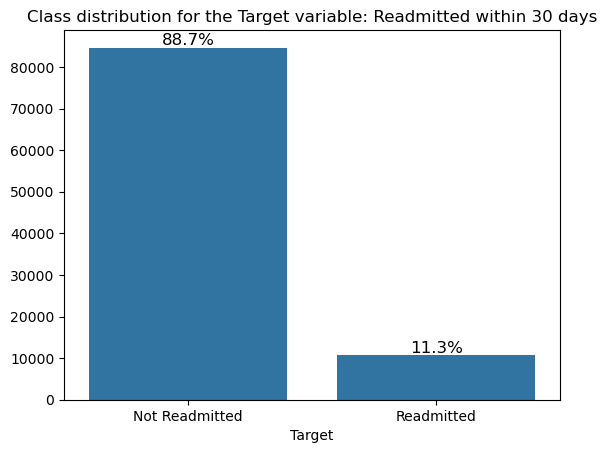

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

b = df['Target'].value_counts()

ax = sns.barplot(x=b.index, y=b.values)

total = df['Target'].count()

# Annotate the bars with percentage labels
for p in ax.patches:
    ax.annotate(f'{(p.get_height()/total)*100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Class distribution for the Target variable: Readmitted within 30 days")
plt.xticks([0, 1], ['Not Readmitted', 'Readmitted'])
plt.show()

#### Observations
As visible, our data is highly imbalanced. Imbalanced datasets can lead to a bias towards the majority class constituting 88.8% of the total, as the model is trained on a majority of samples from the majority class. This can result in poor performance in the minority class. Hence, we need to treat data imbalance.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique or SMOTE for short.

Another method is under-sampling.

Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

We prefer Over-sampling by **SMOTE method**.

### END